In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the data
data = pd.read_csv('./phishing_full.csv')
data.head()

# Drop 'id' column and standardization
features = data.drop(['id', 'CLASS_LABEL'], axis=1)
target = data['CLASS_LABEL']
data_features_std = StandardScaler().fit_transform(features)

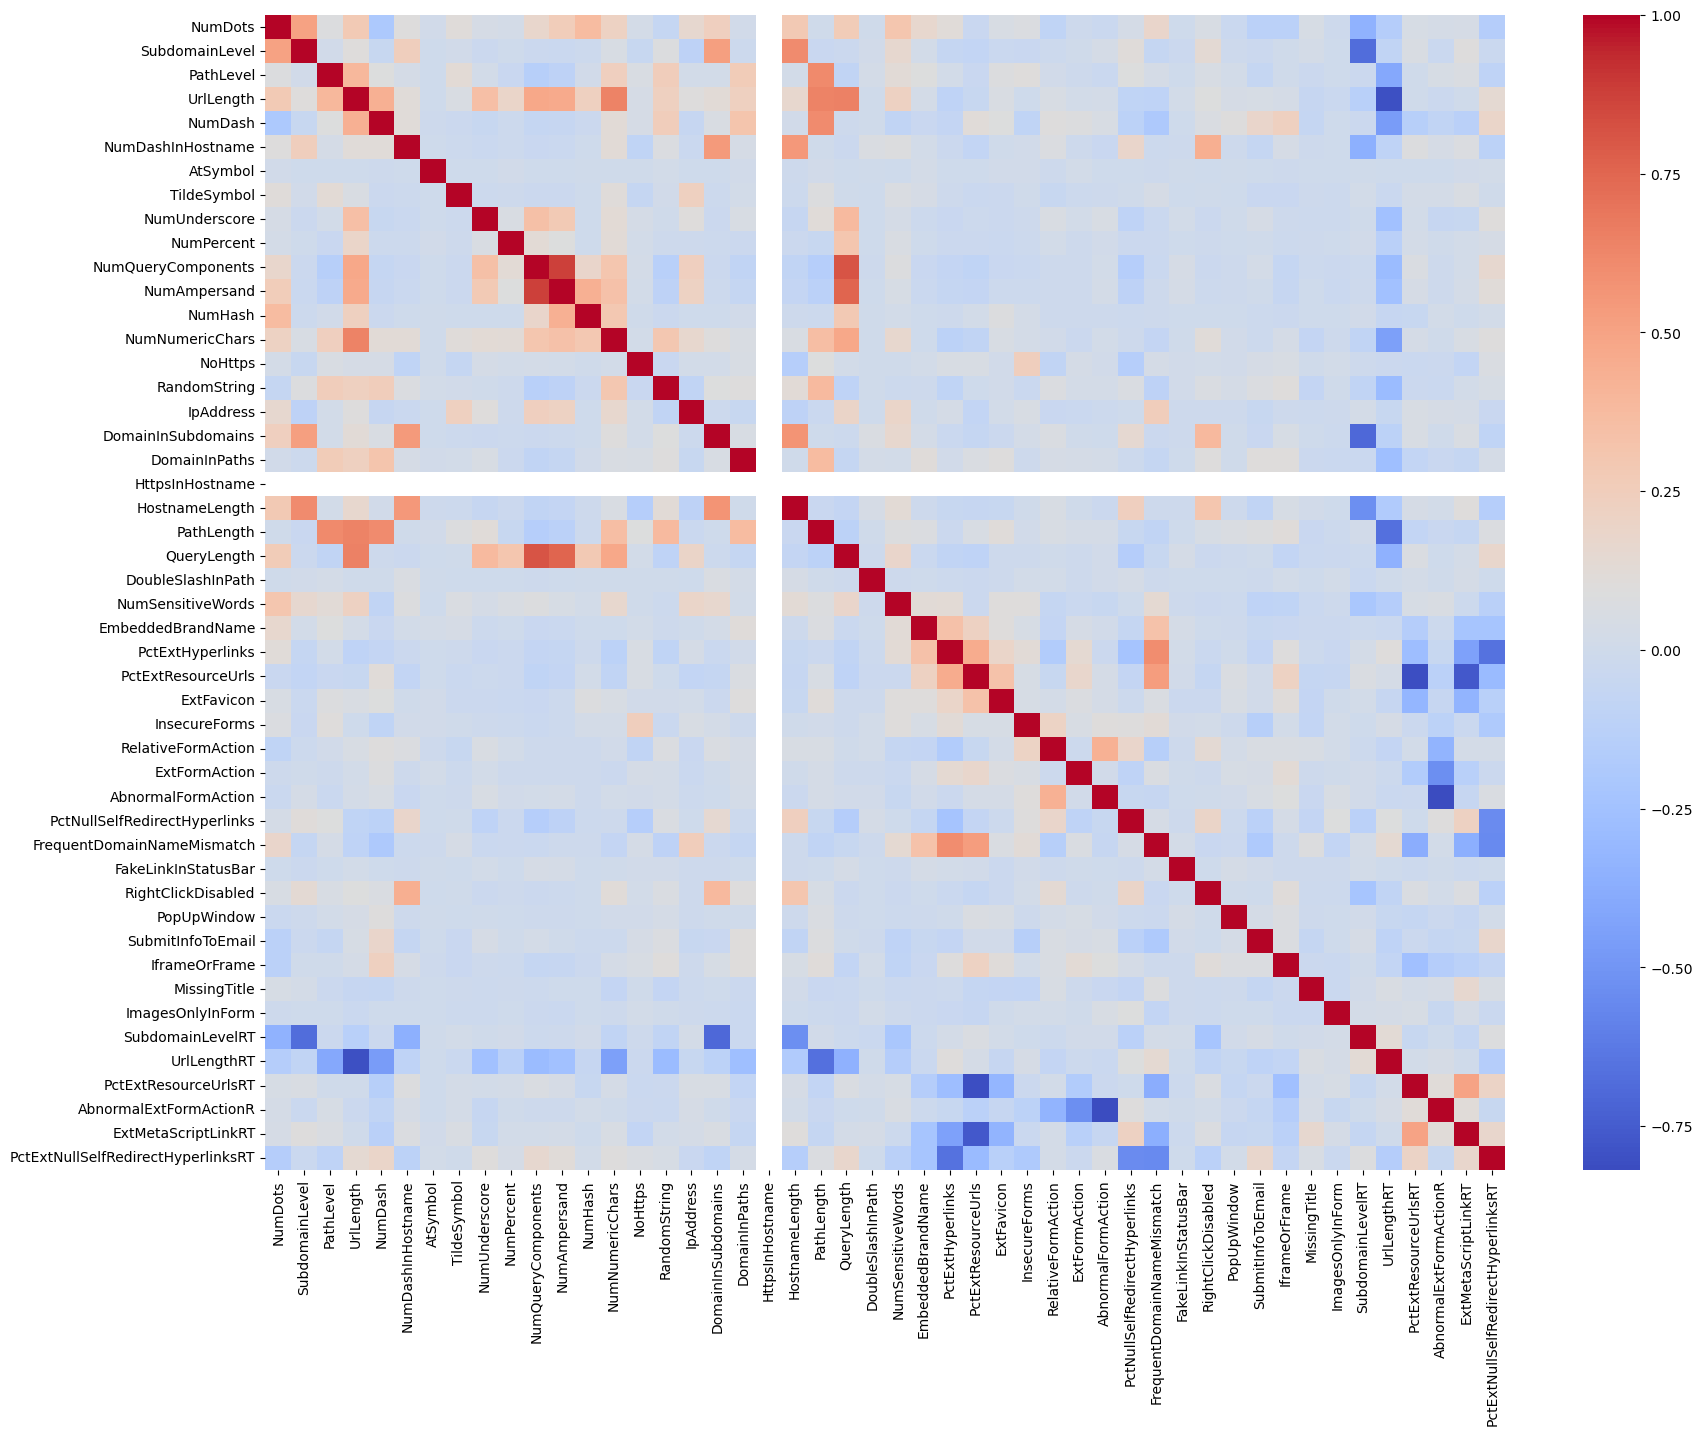

In [4]:
# Calculate the correlation matrix
corr_matrix = features.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            annot=False,
            cmap='coolwarm')
plt.savefig('corr')
plt.show()

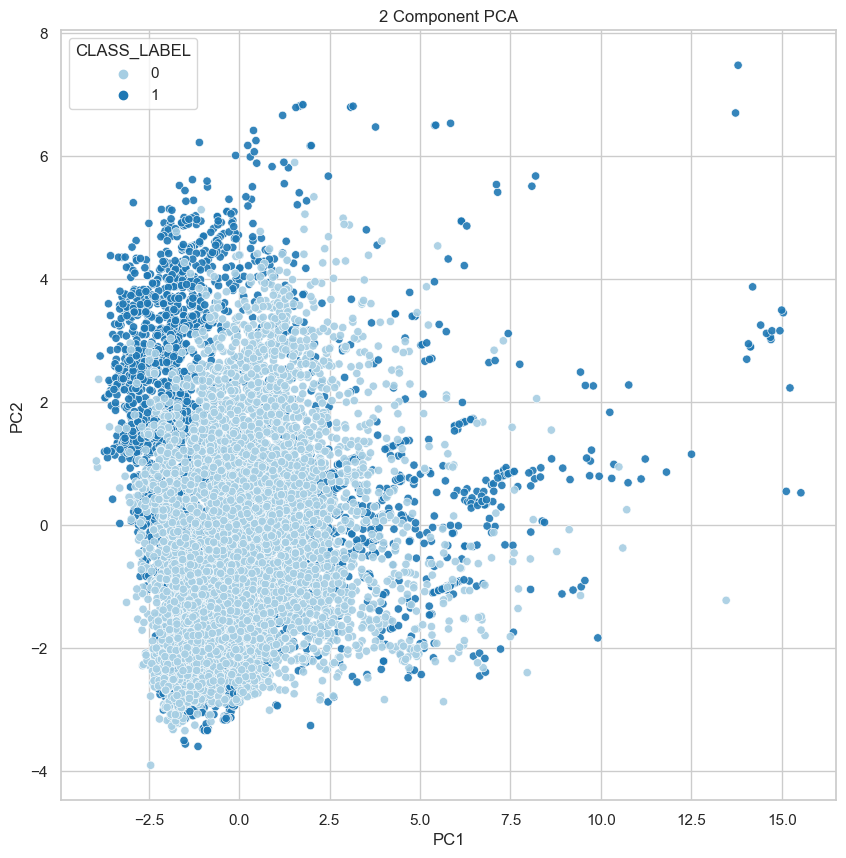

In [80]:
# Perform PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(data_features_std)
principal_df = pd.DataFrame(data = pc, columns=['PC1', 'PC2'])
principal_df = pd.concat([principal_df, target], axis=1)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.scatterplot(x="PC1", y="PC2", hue="CLASS_LABEL",
                palette=sns.color_palette("Paired", 2),
                data=principal_df,
                legend="full",
                alpha=0.9)
plt.title('2 Component PCA')
plt.show()

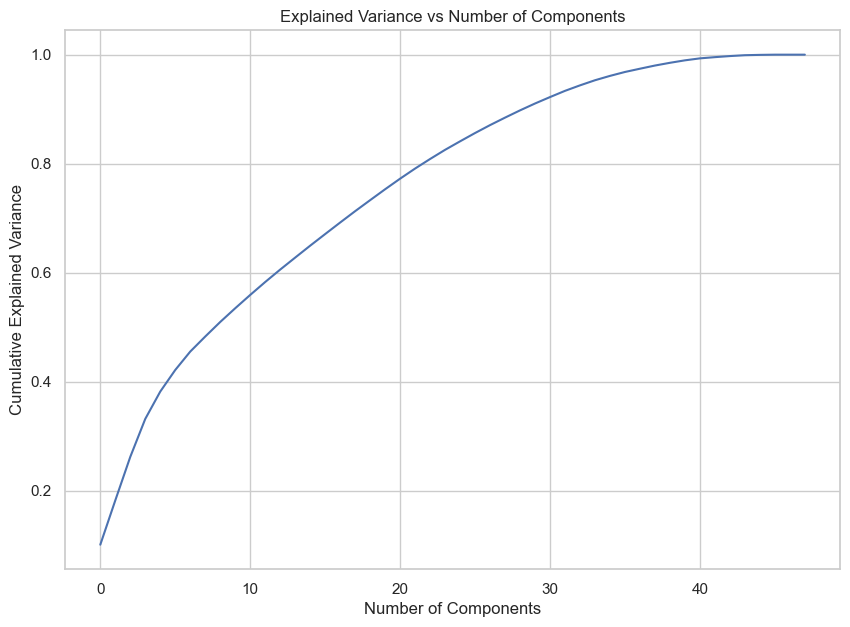

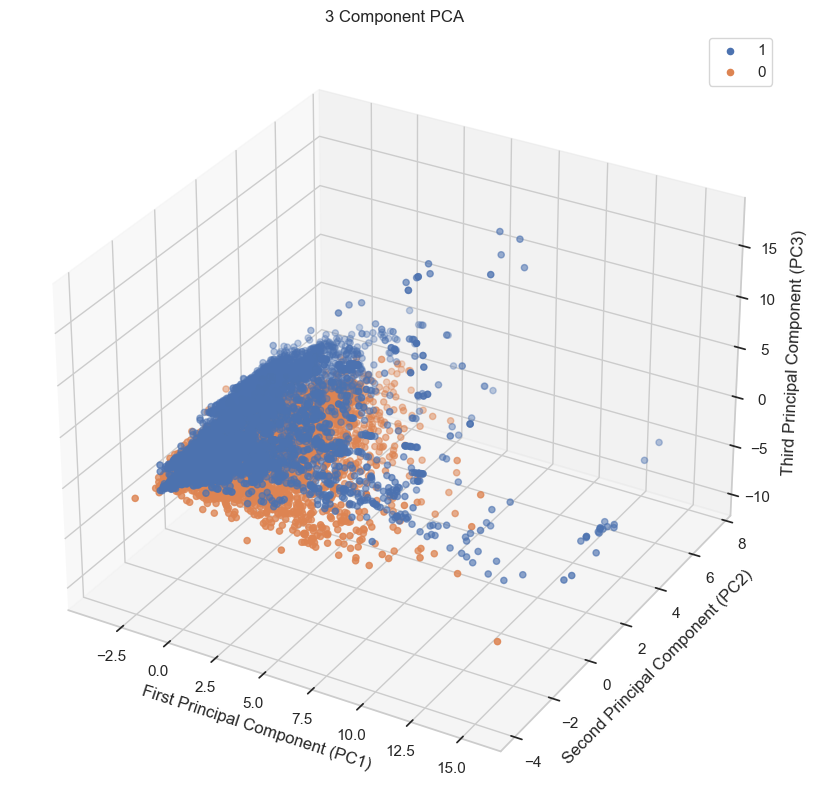

In [51]:
# Perform PCA
pca = PCA()
pc = pca.fit_transform(data_features_std) # define principle components

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance') #for each component
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Convert to dataframe for convenience
principal_df = pd.DataFrame(data = pc)
principal_df = principal_df.iloc[:, :3]
principal_df.columns = ['PC1', 'PC2', 'PC3']
final_df = pd.concat([principal_df, target], axis=1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
targets = [1, 0]
for target_item in targets:
    indicesToKeep = final_df['CLASS_LABEL'] == target_item
    ax.scatter(final_df.loc[indicesToKeep, 'PC1'], 
               final_df.loc[indicesToKeep, 'PC2'],
               final_df.loc[indicesToKeep, 'PC3'],
               cmap = 'Blues_r',
               s=20)
    ax.set_xlabel('First Principal Component (PC1)')
    ax.set_ylabel('Second Principal Component (PC2)')
    ax.set_zlabel('Third Principal Component (PC3)')
    ax.set_title('3 Component PCA')
    ax.legend(targets)
    ax.grid()
plt.show()


/var/folders/8z/kr38t9vx4693jfmjj5wf0b000000gn/T/ipykernel_62165/2053290786.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


['SubdomainLevel', 'UrlLength', 'NumDash', 'NumUnderscore', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'RandomString', 'DomainInSubdomains', 'DomainInPaths', 'HostnameLength', 'PathLength', 'QueryLength', 'NumSensitiveWords', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'AbnormalFormAction', 'FrequentDomainNameMismatch', 'RightClickDisabled', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT']


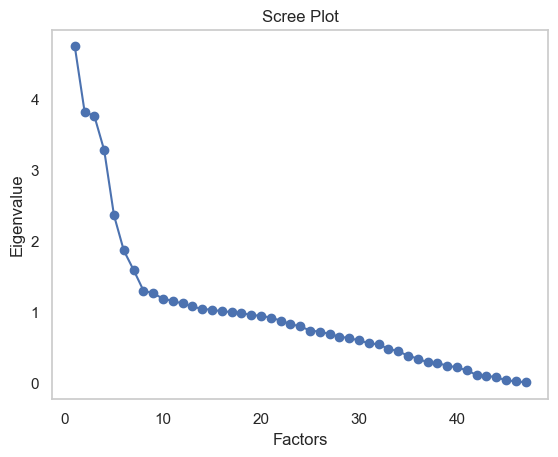

                                     Factor1   Factor2   Factor3   Factor4  \
NumDots                             0.180064  0.026716 -0.028645  0.380243   
SubdomainLevel                     -0.026069 -0.007899 -0.050925  0.833007   
PathLevel                          -0.096352  0.388285 -0.041405 -0.006313   
UrlLength                           0.469453  0.734924 -0.010112  0.089756   
NumDash                            -0.051835  0.775758  0.095815  0.012751   
NumDashInHostname                  -0.026163  0.064143 -0.041523  0.304751   
AtSymbol                           -0.004390  0.001188 -0.003211 -0.003427   
TildeSymbol                        -0.024430  0.036885 -0.023282 -0.009815   
NumUnderscore                       0.261407  0.110599  0.002239 -0.013031   
NumPercent                          0.109022  0.029042 -0.013858 -0.010110   
NumQueryComponents                  0.950313  0.023537 -0.033009  0.001278   
NumAmpersand                        0.917154  0.027969 -0.021948

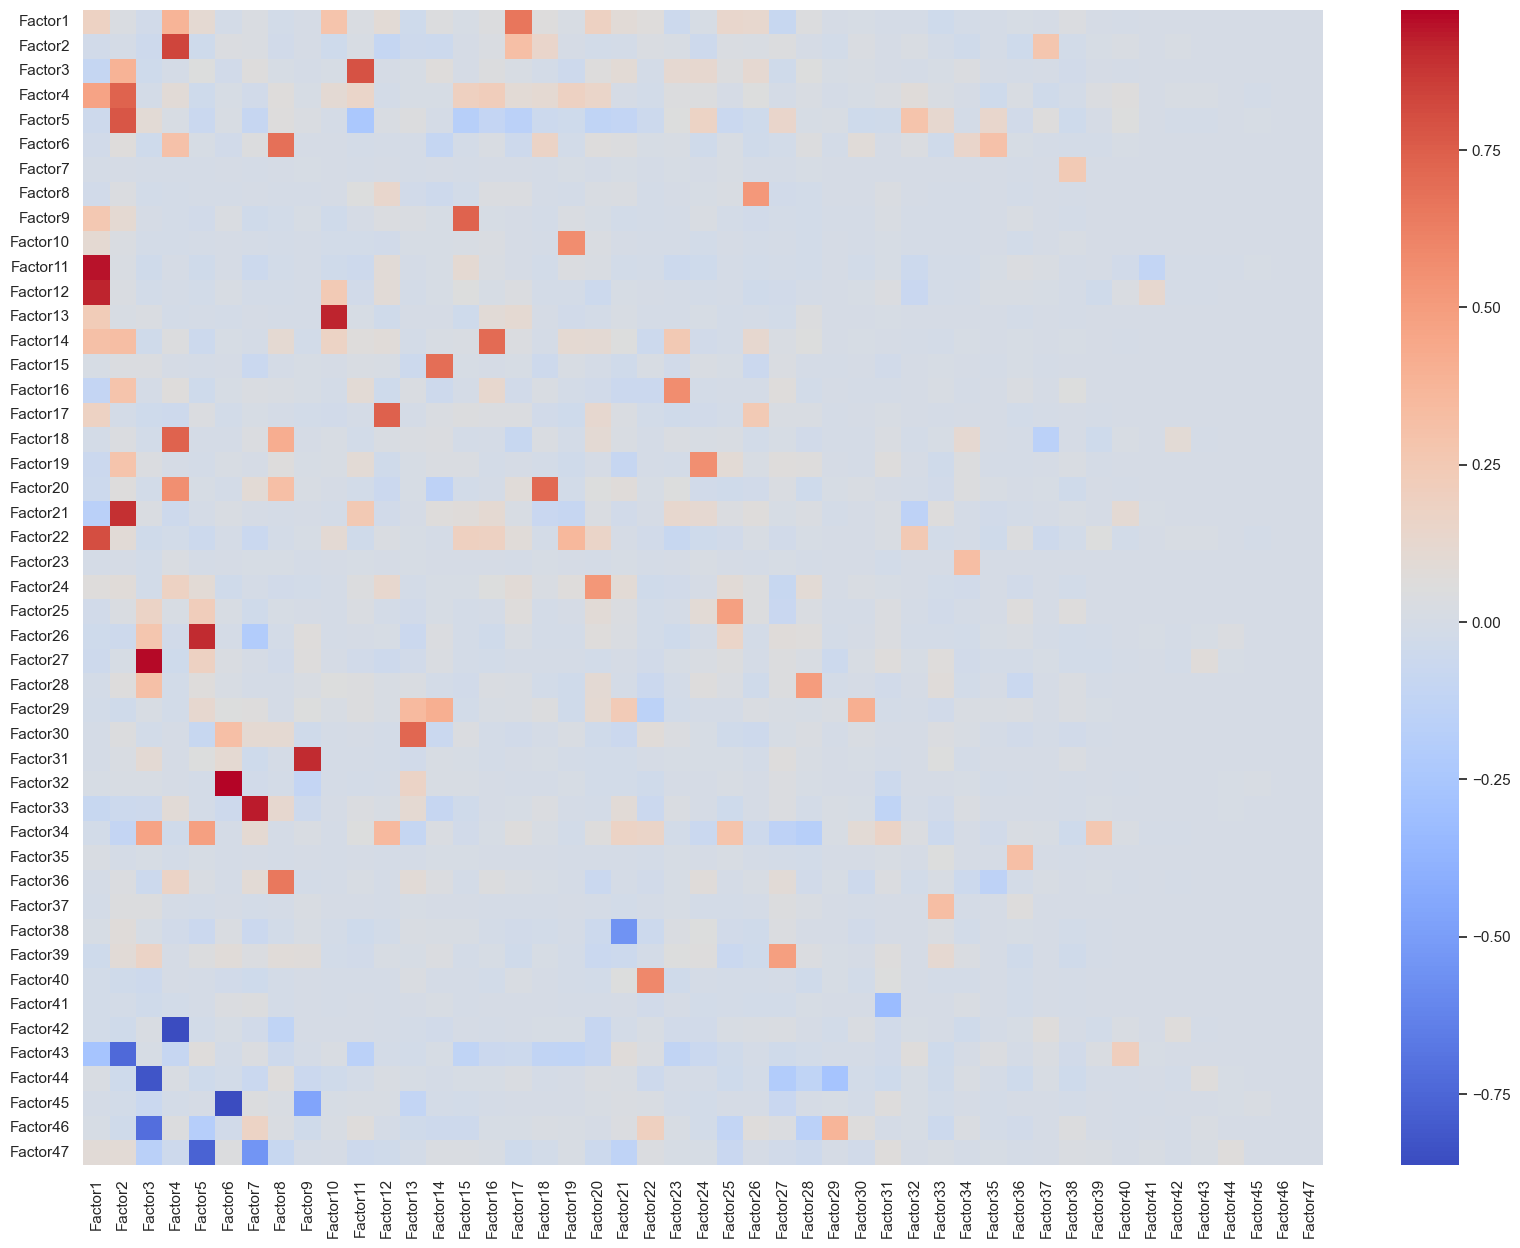

In [114]:
correlation_matrix = features.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.3)]
observations_to_features_ratio = len(data) / len(features.columns)
print(high_corr)

data = pd.read_csv('./phishing_full.csv')
features = data.drop(['id', 'CLASS_LABEL'], axis=1)

from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=10, rotation=None)
features.drop('HttpsInHostname', axis=1, inplace=True) # find all 0 in HttpsInHostname
fa.fit(features)

eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1,features.shape[1]+1), eigen_values)
plt.plot(range(1,features.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
# from the plot see that 10 featrues meet the standard of 80% explanation

choice_n_factors = 47
fa = FactorAnalyzer(n_factors=choice_n_factors, rotation="varimax")
fa.fit(features)

loadings = fa.loadings_
columns = []
for i in range(choice_n_factors):
    str_i = 'Factor'+str(i+1)
    columns.append(str_i)
loadings_df = pd.DataFrame(loadings, columns=columns, index=features.columns)
print(loadings_df)
plt.figure(figsize=(20, 15))
sns.heatmap(loadings, 
            xticklabels=loadings_df.columns.values,
            yticklabels=loadings_df.columns.values,
            annot=False,
            cmap='coolwarm')
plt.show()

# The dataframe shows the factor loadings for each of the features on the two factors. 
# The factor loadings tell us how much each feature contributes to each factor. 
# A high absolute value indicates a strong contribution. 
# We can see from the table that different features contribute more or less to each factor, 
# and some features contribute significantly to both factors.


In [67]:
from sklearn.model_selection import train_test_split

# Set up the target variable and the feature dataframe
X = data.drop(['id', 'CLASS_LABEL'], axis=1)
y = data['CLASS_LABEL']

# Split the dataset into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)


/opt/homebrew/Caskroom/miniforge/base/envs/pt18/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

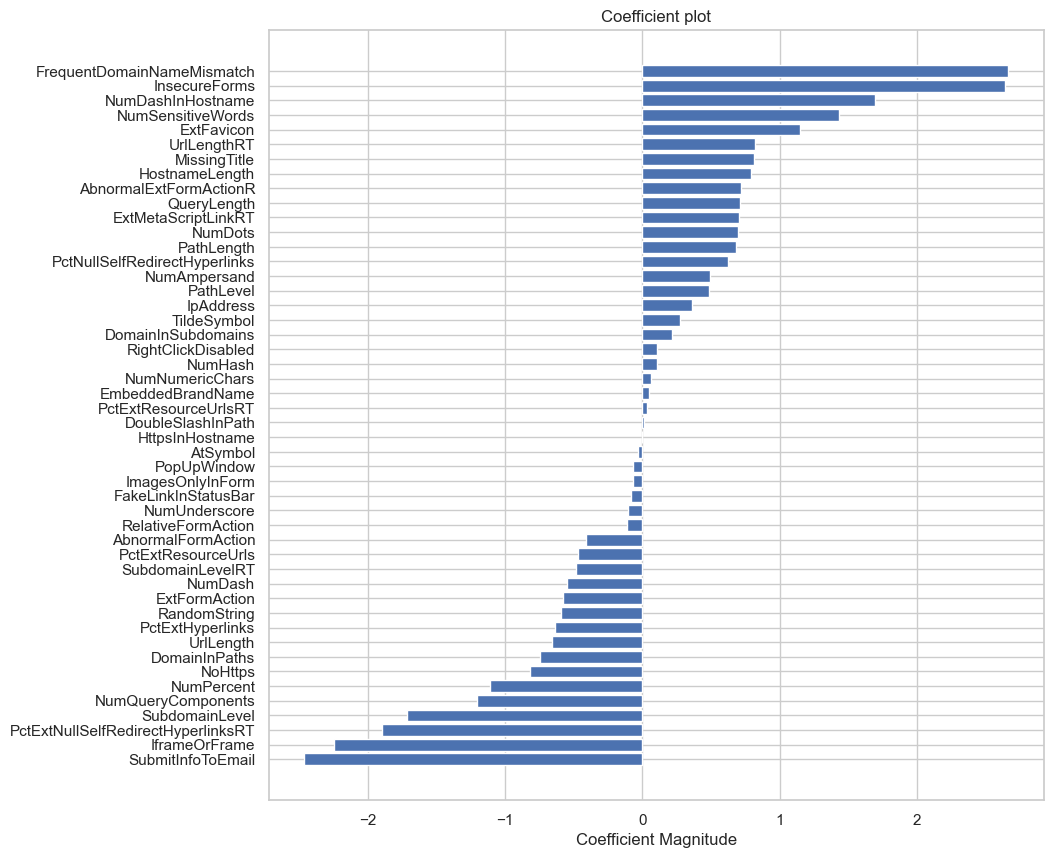

In [69]:
# Get the coefficients
coef = log_reg.coef_[0]
indices = np.argsort(coef)

# Create a plot
plt.figure(figsize=(10, 10))

# Create a bar plot
plt.barh(range(len(indices)), coef[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])

# Add labels
plt.xlabel('Coefficient Magnitude')
plt.title('Coefficient plot')

# Show the plot
plt.show()


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(0.919, 0.9174852652259332, 0.9229249011857708, 0.9201970443349754)

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

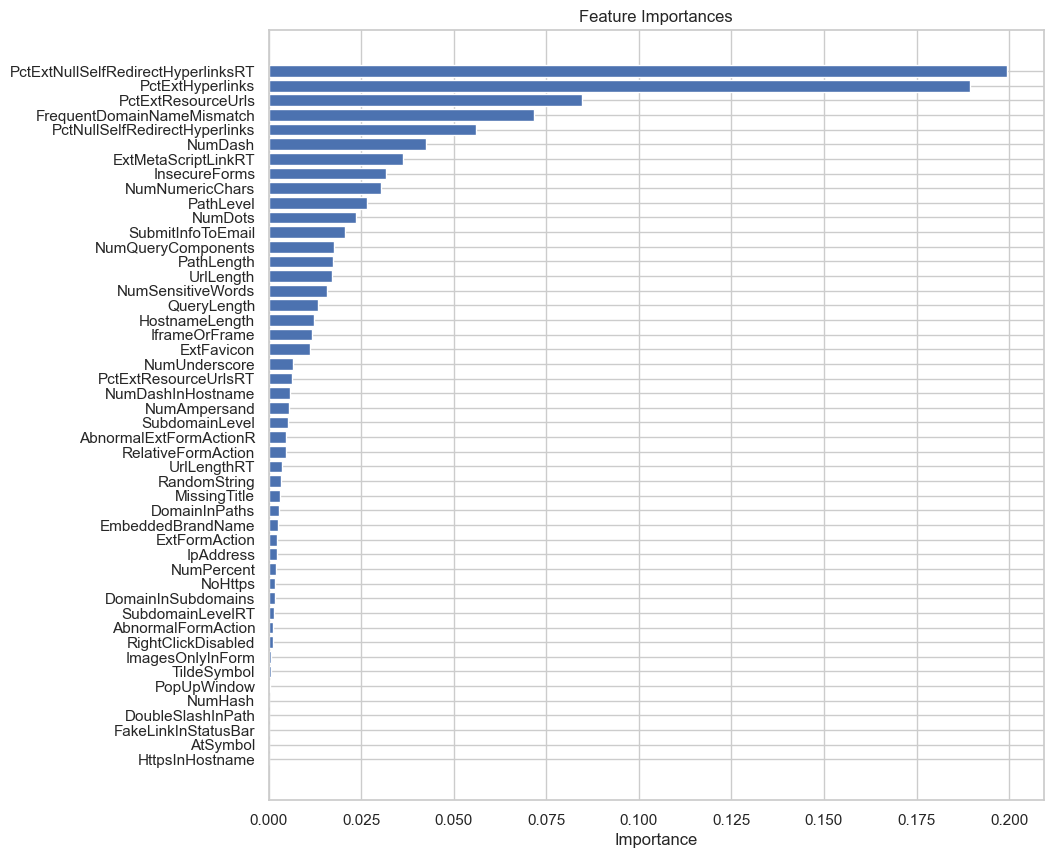

In [72]:
# Get the feature importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

# Create a plot
plt.figure(figsize=(10, 10))

# Create a bar plot
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])

# Add labels
plt.xlabel('Importance')
plt.title('Feature Importances')

# Show the plot
plt.show()


In [73]:
# Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

accuracy_rf, precision_rf, recall_rf, f1_rf


(0.982, 0.9822134387351779, 0.9822134387351779, 0.9822134387351779)

In [77]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_clf.predict(X_test)

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Classifier performance:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1-Score: {f1_xgb}")


/opt/homebrew/Caskroom/miniforge/base/envs/pt18/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Classifier performance:
Accuracy: 0.9885
Precision: 0.985279685966634
Recall: 0.9920948616600791
F1-Score: 0.9886755292959133


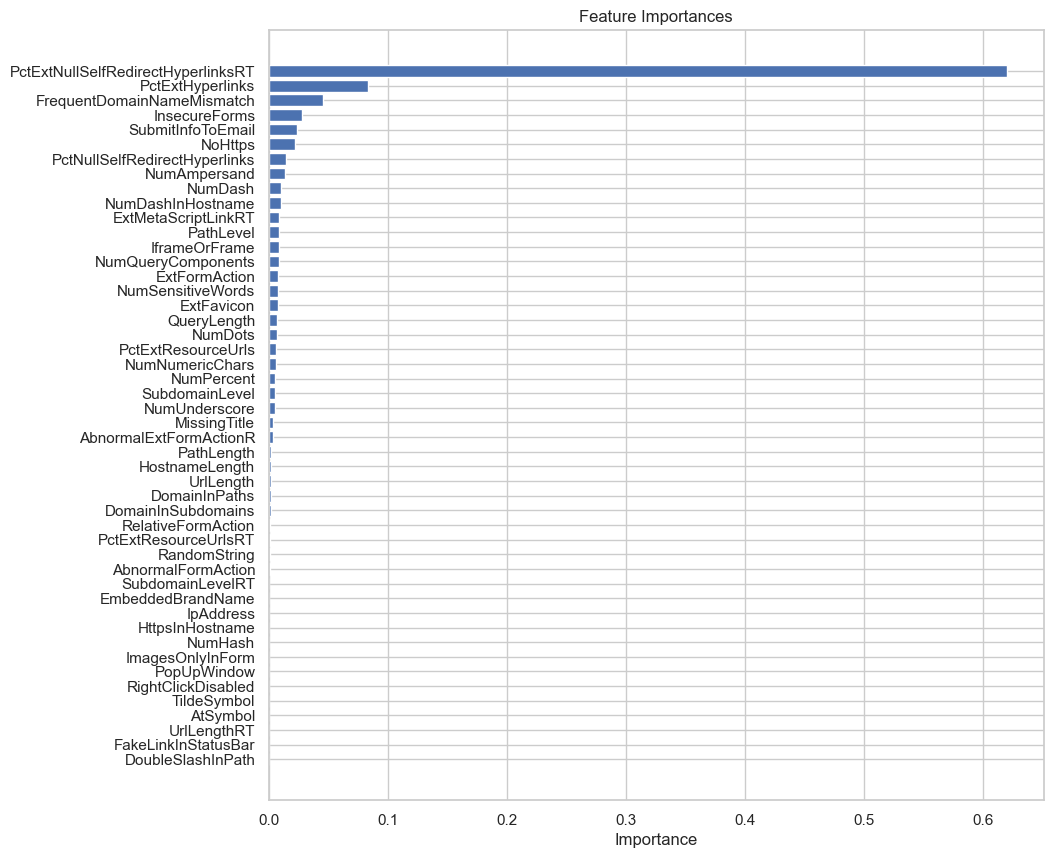

In [78]:
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from subprocess import check_output

In [6]:
data = pd.read_csv('./phish_full.csv', nrows=100000)
train_data = data[:8000]
valid_data = data[8000:]
train_pos = train_data[train_data['type'] == 'benign']['url']
train_neg = train_data[train_data['type'] == 'defacement']['url']
valid_pos = valid_data[valid_data['type'] == 'benign']['url']
valid_neg = valid_data[valid_data['type'] == 'defacement']['url']

Positive words


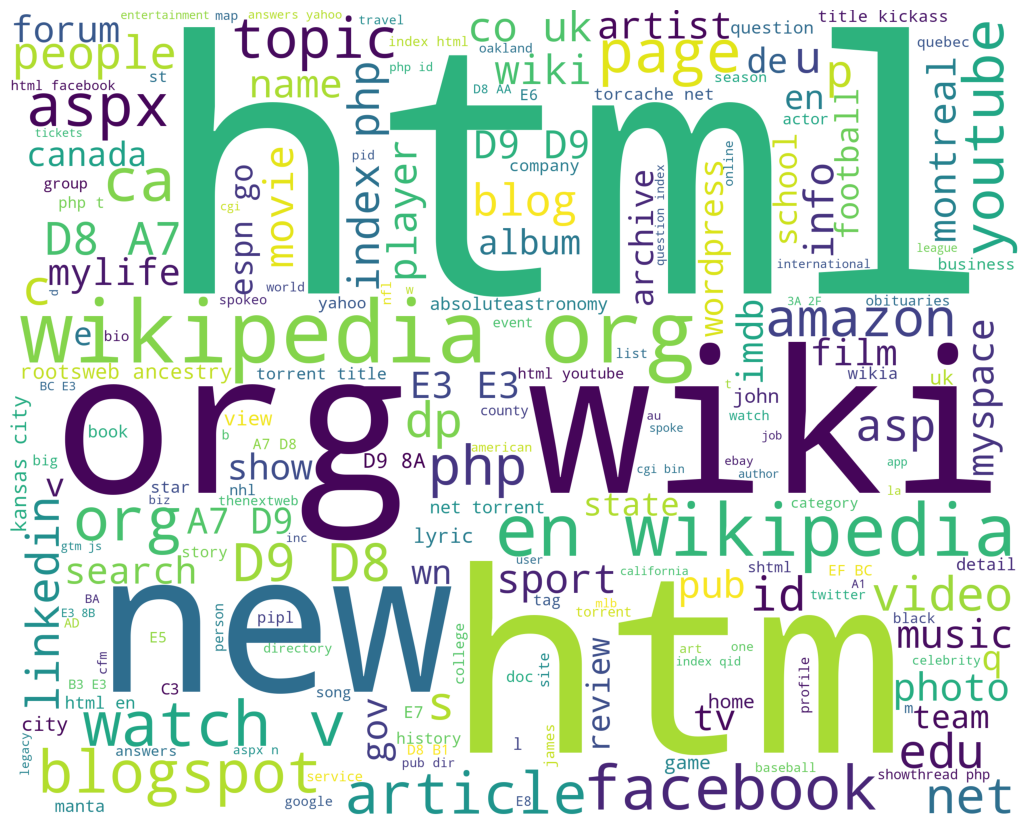

Negative words


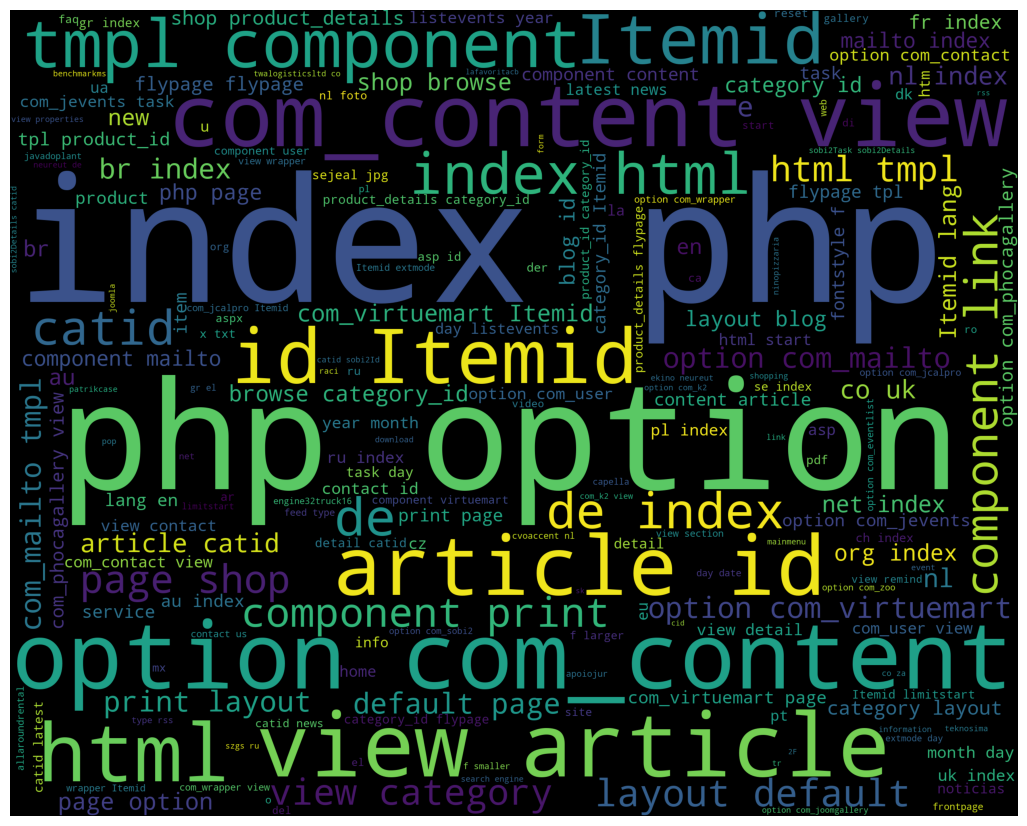

In [7]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()]) # no other constraint
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)